## Check Point 19.2: Simple Linear Regression with OLS
**Assignment: predicting house prices**

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices


To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:


* Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

* Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

* Investigate the data, and do any necessary data cleaning.

* Explore the data and find some variables that you think would be useful in predicting house prices.

* Build your initial model using these features and estimate the parameters using OLS.


Spend up to 4 hours on this assignment. When you are done and have submitted a link to your notebook below, feel free to take a look at this example solution.

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab 
import statistics as stats
import scipy.stats as scipy
from pylab import rcParams
import statsmodels.api as sm
import os

In [128]:
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


housedf = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [102]:
housedf.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
housedf.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

In [103]:
housedf.isnull().sum().sort_values(ascending = False)

poolqc           1453
miscfeature      1406
alley            1369
fence            1179
fireplacequ       690
lotfrontage       259
garagecond         81
garagetype         81
garageyrblt        81
garagefinish       81
garagequal         81
bsmtexposure       38
bsmtfintype2       38
bsmtfintype1       37
bsmtcond           37
bsmtqual           37
masvnrarea          8
masvnrtype          8
electrical          1
utilities           0
yearremodadd        0
mssubclass          0
foundation          0
extercond           0
exterqual           0
exterior2nd         0
exterior1st         0
roofmatl            0
roofstyle           0
yearbuilt           0
                 ... 
garagearea          0
paveddrive          0
wooddecksf          0
openporchsf         0
threessnporch       0
bsmtunfsf           0
screenporch         0
poolarea            0
miscval             0
mosold              0
yrsold              0
saletype            0
functional          0
totrmsabvgrd        0
kitchenqua

Looking at the null values above there are several different ways of dealing with them, mostly based on what the dtype of the feature is. For the features that are objects I decided since they are describing something that doesn't exist (like pool quality) and the matching feature has a value ('none') I could convert all of these to another word, like 'blank'.

In [129]:
# Creating the for loop to take care of all missing values in object columns.
column = (['poolqc', 'fence', 'miscfeature', 'alley', 'fireplacequ', 'garagecond', 'garagetype', 'garagefinish', 'garagequal', 
            'bsmtexposure', 'bsmtfintype2', 'bsmtfintype1', 'bsmtcond', 'bsmtqual', 'masvnrtype', 'electrical'])

for col_name in column:
   housedf[col_name].fillna('blank', inplace= True)

In [131]:
  # Since this feature has a min. value of 0 it won't hurt if I turn all missing values to a 0 as well
housedf['masvnrarea'].fillna(0, inplace= True)

In [136]:
# Since the remaining two features only have a minimal number of null values and can't be set to 0 I'm going to set them to 
# the average of the column.

housedf['lotfrontage'].fillna(housedf['lotfrontage'].mean(),inplace=True)
housedf['garageyrblt'].fillna(housedf['garageyrblt'].mean(),inplace=True)


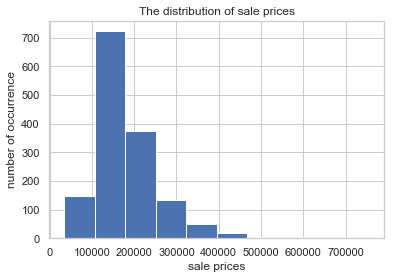

In [162]:
# Step 1: Look at distribution of the sale price
plt.hist(housedf.saleprice)
plt.title("The distribution of sale prices")
plt.xlabel("sale prices")
plt.ylabel("number of occurrence")
plt.show()

In [171]:
#Borrowed this piece of code and the one below from the example: these are designed to help seperate columns faster!
non_numeric_columns = housedf.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numerical columns is 43


In [166]:
numeric_columns = housedf.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


In [167]:
# Looking at how numeric features are correlated to sales price- looking for key features to use in model!
np.abs(housedf[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
masvnrarea       0.472614
garageyrblt      0.470177
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.334901
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

In [187]:
sale_price = pd.cut(housedf['saleprice'], [0, 130000, 170000, 220000, 800000])

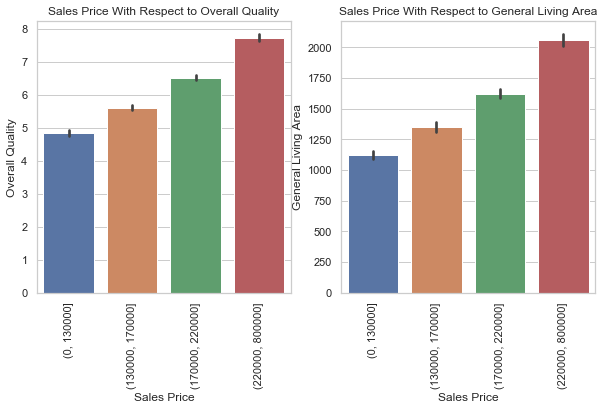

In [204]:
# Let's look and see how these 5 features compare to sales price.
plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.barplot(x= sale_price, y= housedf['overallqual'], data = housedf)
plt.title('Sales Price With Respect to Overall Quality')
plt.xlabel('Sales Price')
plt.ylabel('Overall Quality')
plt.xticks(rotation = 90);

plt.subplot(1,2,2)
sns.barplot(x= sale_price, y= housedf['grlivarea'], data = housedf)
plt.title('Sales Price With Respect to General Living Area')
plt.xlabel('Sales Price')
plt.ylabel('General Living Area')
plt.xticks(rotation = 90);


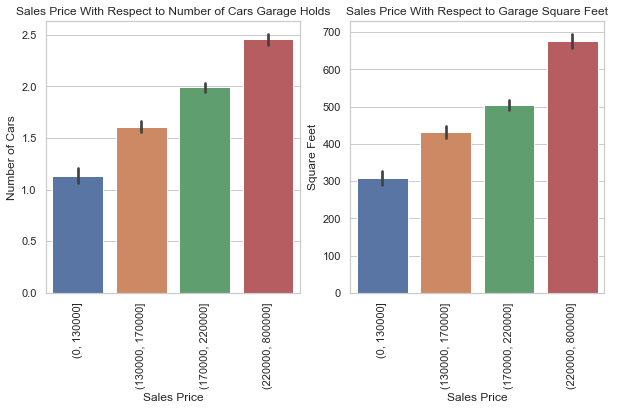

In [206]:
plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.barplot(x= sale_price, y= housedf['garagecars'], data = housedf)
plt.title('Sales Price With Respect to Number of Cars Garage Holds')
plt.xlabel('Sales Price')
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90);

plt.subplot(1,2,2)
sns.barplot(x= sale_price, y= housedf['garagearea'], data = housedf)
plt.title('Sales Price With Respect to Garage Square Feet')
plt.xlabel('Sales Price')
plt.ylabel('Square Feet')
plt.xticks(rotation = 90);

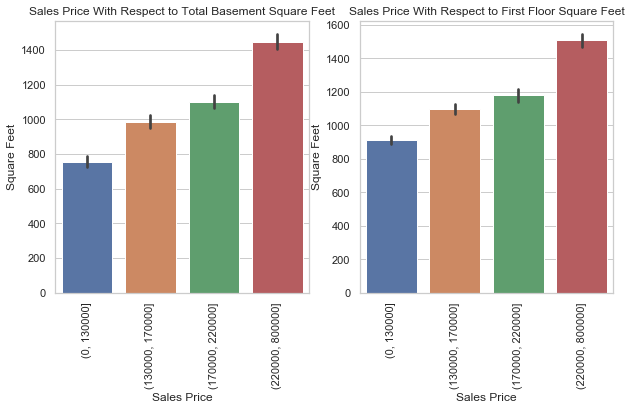

In [207]:
plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
sns.barplot(x= sale_price, y= housedf['totalbsmtsf'], data = housedf)
plt.title('Sales Price With Respect to Total Basement Square Feet')
plt.xlabel('Sales Price')
plt.ylabel('Square Feet')
plt.xticks(rotation = 90);

plt.subplot(1,2,2)
sns.barplot(x= sale_price, y= housedf['firstflrsf'], data = housedf)
plt.title('Sales Price With Respect to First Floor Square Feet')
plt.xlabel('Sales Price')
plt.ylabel('Square Feet')
plt.xticks(rotation = 90);

In [210]:
# Let's make our model
X = housedf[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']] 
Y = housedf.saleprice

In [213]:
# I totally borrowed this last part exactly from the solution and will need some help breaking down what these mean!
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     926.5
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:59:26   Log-Likelihood:                -17499.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.907e+04   4638.450    -21.359      0.000   -1.08e+05      -9e+04
overallqual  2.364e+04   1072.532     22.037      0.000    2.15e+04    2.57e+04
grlivarea      45.3458      2.489     18.218      0.000      40.463      50.228
garagecars   1.454e+04   3022.681      4.812      0.000    8615.034    2.05e+04
garagearea     17.1334     10.468      1.637      0.102      -3.401      37.668
totalbsmtsf    31.5015      2.904     10.848      0.000      25.805      37.198
==============================================================================
Omnibus:                      438.146   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40648.199
Skew:                          -0.338   Prob(JB):                         0.00
Kurtosis:                      28.841   Cond. No.                     9.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""